In [1]:
#select
#scm.*, czp.czp_id, czp.czp_op_id, czp.CZP_START_DATE, 
#czp.CZP_EXPIRY_DATE, czp.CZP_PERCENTAGE, czp.CZP_PRICE, 
#czp.CZP_DURATION, czp.CZP_ZTQ_ID, k.K_REGISTER, osp.*
#from zoocube.ddstf_scm_sales_contrib_margin scm
#join ZOOMAN.KUNDEN k
#on scm.CUS_N_KEY_CUSTOMER = k.K_ID 
#and k.K_REGISTER = 1
#join ZOOMAN.ORDER_SALES_PROFILE osp
#on osp.OSP_O_ID = scm.SCM_N_ORDER_NR
#left outer join ZOOMAN.CUSTOMERS_ZOOPRIME_PLANS czp
#on scm.CUS_N_KEY_CUSTOMER = czp.CZP_K_ID 
#and czp.CZP_EXPIRY_DATE >= to_date((to_char(TDT_T_KEY_ORDER_DATE, 'dd/mm/yyyy') ||' '|| THR_C_KEY_ORDER_HOUR), 'dd/mm/yyyy HH24:MI')
#and czp.CZP_START_DATE <= to_date((to_char(TDT_T_KEY_ORDER_DATE, 'dd/mm/yyyy') ||' '|| THR_C_KEY_ORDER_HOUR), 'dd/mm/yyyy HH24:MI')
#where SIT_N_KEY_SITE = 22
#and TDT_T_KEY_ORDER_DATE >= to_date('01/01/18', 'DD/MM/YY')
#and TDT_T_KEY_ORDER_DATE <= to_date('15/04/18', 'DD/MM/YY')
#and (scm.SCM_C_ORDER_STATUS = 'L' OR scm.SCM_C_ORDER_STATUS = 'VK')
#and osp.OSP_KO_COUNT_NET IN (1,2)
#;

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [3]:
data = pd.read_csv('hu_shop_new_customers_2.dsv', sep = ';', low_memory=False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85562 entries, 0 to 85561
Columns: 191 entries, SCM_N_ORDER_POS_NR to OSP_EUR_VALUE
dtypes: float64(31), int64(83), object(77)
memory usage: 124.7+ MB


In [5]:
#after some exploration
not_used_cols = ['SCM_D_LIST_PRICE_UNIT', 'SCM_D_LIST_PRICE',
       'SCM_D_LIST_PRICE_UNIT_DISCOUNT', 'SCM_D_LIST_PRICE_DISCOUNT',
       'SCM_D_REC_PRICE_UNIT', 'SCM_D_REC_PRICE',
       'SCM_D_REC_PRICE_UNIT_DISCOUNT', 'SCM_D_REC_PRICE_DISCOUNT',
       'AUD_N_KEY_INS', 'AUD_N_KEY_UPD', 'SCM_T_SYS_CREATED_ON',
       'SCM_C_SYS_CREATED_BY', 'SCM_T_SYS_UPDATED_ON',
       'SCM_C_SYS_UPDATED_BY', 'SCM_D_ORDER_PROB',
       'SCM_DHL_RETURN_REASON',
       'SCM_DHL_REAL_RETURN', 'SCM_D_RETURNED_VAL_NET',
       'SCM_D_EXCHANGE_RATE', 'SCM_D_CURRENCY', 'SCM_D_CURRENCY_ORIG',
       'SCM_D_EXCHANGE_RATE_REAL', 'SCM_D_RETURN_POSTAGE_COSTS',
       'SCM_D_RETURN_REASON', 'SCM_D_SALES_CANCEL_QTY',
       'SCM_D_SALES_CANCEL_VAL', 'SCM_D_SALES_CANCEL_VAL_NET',
       'SCM_D_MST_PHY_ART_QTY', 'SCM_D_WRONG_RETURN_BOOKING',
       'SCM_D_IS_SHIPPED', 'SCM_D_EXCHANGE_RATE_FINANCE',
       'SCM_D_ORIG_ORDER_VALUE', 'SCM_D_ORIG_FINANCE_ORDER_VALUE',
       'SCM_D_ORIG_REAL_ORDER_VALUE', 'SCM_D_PAID', 'SCM_D_MISSING_ITEM_IN_PARCEL',
       'SCM_DATE_FULFILLMENT', 'SCM_D_PC_ID', 'SCM_D_PCB_ID',
       'SCM_D_PC_DSP', 'SCM_D_PC_ID_RET',
       'SCM_D_PC_ID_SALC', 'SCM_ID', 'SCM_RETURN_REASON_ID',
       'SCM_RETURN_REACTION_TIME', 'SCM_EXCHANGE_RETURN',
       'SCM_RETURN_IS_OK', 'SCM_CM2_BMF_INCL_EXTRA_COSTS', 'SCM_CM1_BMF_INCL_PU_EX',
       'SCM_LINEHOLD_COSTS_PHY_ART', 'SCM_CM1_BMF_PC_EX_VOL',
       'SCM_CM2_BMF_REAL_VOL', 'SCM_PAYMENT_PROVIDER', 'SCM_CM1_CP', 'SCM_CM2_CP', 'SCM_CM3_CP', 'SCM_CM4_CP',
       'SCM_CM1_BMF_CP', 'SCM_CM2_BMF_CP', 'SCM_CM3_BMF_CP',
       'SCM_CM4_BMF_CP', 'SCM_NETSALES_CP', 'SCM_NETSALES_BMF_CP', 'SCM_ORDER_HOUR', 'SCM_FC_HOUR', 'SCM_SHIPPING_HOUR',
                 'SCM_DELIVERY_TIME',
       'SCM_WAREHOUSE_TIME', 'SCM_TOTAL_ORDER_TIME',
       'SCM_POSTOFFICE_DATE', 'SCM_POSTOFFICE_HOUR',
       'SCM_TO_POSTOFFICE_TIME', 'SCM_FROM_POSTOFFICE_HOUR',
       'SCM_FIRST_ORDER_CT_ID', 'SCM_FIRST_ORDER_DATE', 'SCM_ORDER_DAY',
       'SCM_FC_DAY', 'SCM_SHIPPING_DAY', 'SCM_POSTOFFICE_DAY',
       'SCM_DELIVERY_DAY', 'SCM_NUMBER_DEV_TRY',
       'SCM_PARCEL_IS_UNDELIVERABLE', 'SCM_MAIN_CATEGORY',
    'SCM_RETURNS_BMF',
       'SCM_SALES_CANCEL_BMF', 'SCM_SB_CLASS']

In [6]:
cols = [i for i in data.columns.values if i not in not_used_cols]

In [7]:
len(cols)

105

In [8]:
nc_hu = data[cols]

In [9]:
#Total orders
nc_hu['SCM_N_ORDER_NR'].nunique()

18221

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
nc_hu['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(nc_hu['TDT_T_KEY_ORDER_DATE'], format="%d/%m/%y")

In [12]:
lista = [float(i.replace(',','.')) for i in nc_hu['SCM_D_SALES_VALUE']]
nc_hu['SCM_D_SALES_VALUE'] = lista

In [13]:
lista1 = [float(str(i).replace(',','.')) for i in nc_hu['SCM_SALES_BMF']]
nc_hu['SCM_SALES_BMF'] = lista1

In [14]:
lista2 = [float(i.replace(',','.')) for i in nc_hu['SCM_D_FINANCE_CM1']]
nc_hu['SCM_D_FINANCE_CM1'] = lista2

In [15]:
lista3 = [float(i.replace(',','.')) for i in nc_hu['SCM_D_FINANCE_CM2']]
nc_hu['SCM_D_FINANCE_CM2'] = lista3

In [16]:
nc_hu['CZP_START_DATE'] = pd.to_datetime(nc_hu['CZP_START_DATE'], format="%d/%m/%y")
nc_hu['CZP_EXPIRY_DATE'] = pd.to_datetime(nc_hu['CZP_EXPIRY_DATE'], format="%d/%m/%y")

In [17]:
#Check if, due to start/expiry/order date some data has been duplicated... 
nc_hu.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values

array([array(['NaT'], dtype='datetime64[ns]'),
       array(['NaT'], dtype='datetime64[ns]'),
       array(['NaT'], dtype='datetime64[ns]'), ...,
       array(['2018-04-15T00:00:00.000000000'], dtype='datetime64[ns]'),
       array(['NaT'], dtype='datetime64[ns]'),
       array(['NaT'], dtype='datetime64[ns]')], dtype=object)

In [18]:
dupl_mask = [len(i) > 1 for i in nc_hu.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values]

In [19]:
len(dupl_mask)

18221

In [20]:
sum(dupl_mask)

1

In [21]:
dup_orders = nc_hu.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique()[dupl_mask].index.values

In [22]:
#Let's get incorrect duplicated indexes instead of order_id to exclude them and select de correct data subset
dup_indexes = []

for i in dup_orders:
    o_id = nc_hu[nc_hu['SCM_N_ORDER_NR'] == i]
    sp_dates = o_id['CZP_START_DATE'].value_counts().index.values
    min_date = o_id[o_id['CZP_START_DATE'] < max(sp_dates)]
    dup_indexes.append(min_date.index.values)

In [23]:
#Get a flatten list of indexes
dupl_ind = [i for lista in dup_indexes for i in lista]

In [24]:
exclude_data = nc_hu.index.isin(dupl_ind)

In [25]:
#Clean subset selection
nc_hu = nc_hu[~exclude_data]

## Changes : PG4 Restrictions, DCR and Prices

In [26]:
#Let`s quantify orders buying savings plan
sp_daily = nc_hu[nc_hu['SCM_MASTER_AP_ID'] == 42225].groupby('TDT_T_KEY_ORDER_DATE')['SCM_MASTER_AP_ID'].count()

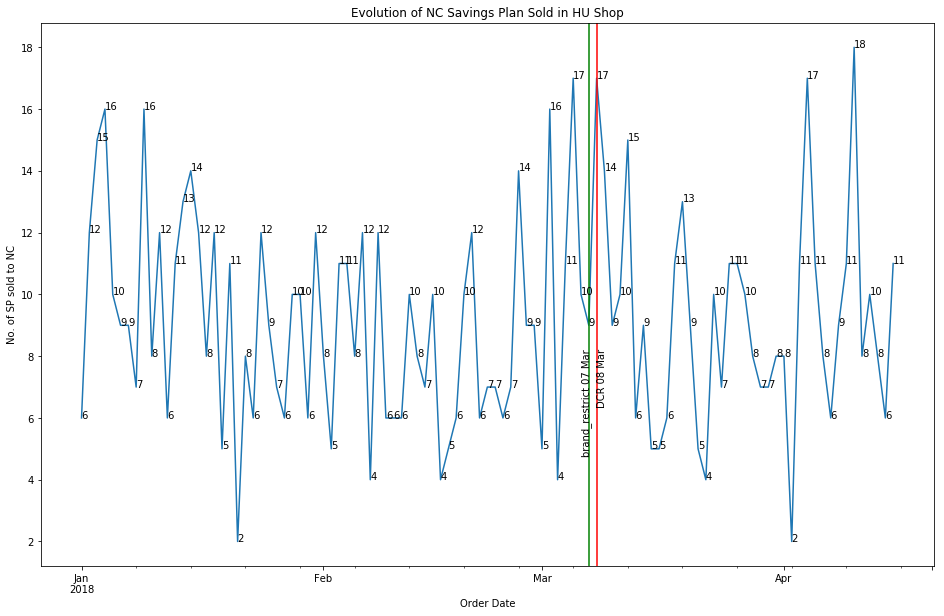

In [27]:
plt.figure(figsize=(16,10))
(sp_daily).plot()
plt.ylabel('No. of SP sold to NC')
plt.xlabel('Order Date')
plt.title('Evolution of NC Savings Plan Sold in HU Shop')

plt.axvline(x='2018-03-07', color='green')
plt.text('2018-03-06', 8, 'brand_restrict 07 Mar', rotation=90)
plt.axvline(x='2018-03-08', color='red')
plt.text('2018-03-08', 8, 'DCR 08 Mar', rotation=90)

ax = plt.gca()
for i, txt in enumerate(sp_daily):
    ax.annotate(txt, (sp_daily.index[i],sp_daily.values[i]))

In [28]:
sp_daily[sp_daily.index < '2018-03-07'].mean()

9.061538461538461

In [29]:
sp_daily[sp_daily.index >= '2018-03-07'].mean()

9.25

A two-sample t-test investigates whether the means of two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both groups are the same. 

In [30]:
import scipy.stats as stats
stats.ttest_ind(sp_daily[sp_daily.index < '2018-03-07'],
                sp_daily[sp_daily.index >= '2018-03-07'],
                equal_var=False) 

Ttest_indResult(statistic=-0.26857144713836256, pvalue=0.7889521869724152)

There is no statistical envidence enough to reject the null hypothesis stating mean equality

In [31]:
#How to get the price with exchange rate(?)
lista4 = [float(str(i).replace(',','.')) for i in nc_hu['CZP_PRICE']]
nc_hu['CZP_PRICE'] = lista4

In [32]:
buy_sp_orders = nc_hu[nc_hu['SCM_MASTER_AP_ID'] == 42225]['SCM_N_ORDER_NR'].unique()

In [33]:
#Let`s quantify sales related to savings plan price
sp_sales_daily = nc_hu[nc_hu['SCM_MASTER_AP_ID'] == 42225].groupby('TDT_T_KEY_ORDER_DATE')['SCM_SALES_BMF'].sum()

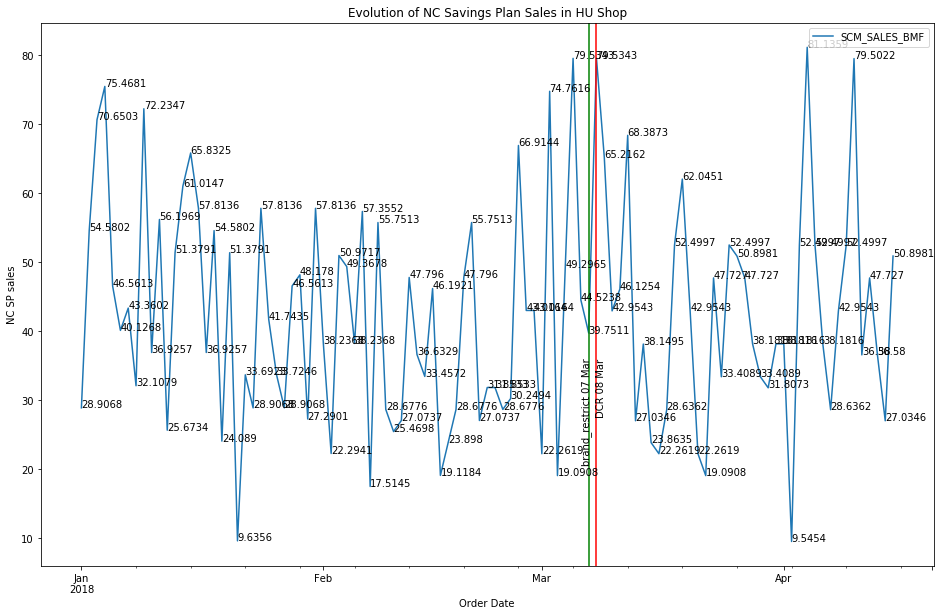

In [34]:
plt.figure(figsize=(16,10))
(sp_sales_daily).plot()
plt.ylabel('NC SP sales')
plt.xlabel('Order Date')
plt.title('Evolution of NC Savings Plan Sales in HU Shop')
plt.legend()

plt.axvline(x='2018-03-07', color='green')
plt.text('2018-03-06', 35, 'brand_restrict 07 Mar', rotation=90)
plt.axvline(x='2018-03-08', color='red')
plt.text('2018-03-08', 35, 'DCR 08 Mar', rotation=90)

ax = plt.gca()
for i, txt in enumerate(sp_sales_daily):
    ax.annotate(txt, (sp_sales_daily.index[i],sp_sales_daily.values[i]))

In [35]:
sp_sales_daily[sp_sales_daily.index < '2018-03-07'].mean()

42.19176307692307

In [36]:
sp_sales_daily[sp_sales_daily.index >= '2018-03-07'].mean()

43.226555000000005

In [37]:
stats.ttest_ind(sp_sales_daily[sp_sales_daily.index < '2018-03-07'],
                sp_sales_daily[sp_sales_daily.index >= '2018-03-07'],
                equal_var=False) 

Ttest_indResult(statistic=-0.3153577876445345, pvalue=0.7533031349125703)

There is not enough statistical evidence (p-value > 0.05) to reject the null hypothesis supossing mean equality.

In [38]:
# And now absolute cm1 and cm2 (mean) per order per day 
sp_cm1_daily = nc_hu[nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)].groupby('TDT_T_KEY_ORDER_DATE')['SCM_D_FINANCE_CM1'].sum()/\
               nc_hu[nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)].groupby('TDT_T_KEY_ORDER_DATE')['SCM_N_ORDER_NR'].nunique()
sp_cm2_daily = nc_hu[nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)].groupby('TDT_T_KEY_ORDER_DATE')['SCM_D_FINANCE_CM2'].sum()/\
               nc_hu[nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)].groupby('TDT_T_KEY_ORDER_DATE')['SCM_N_ORDER_NR'].nunique()

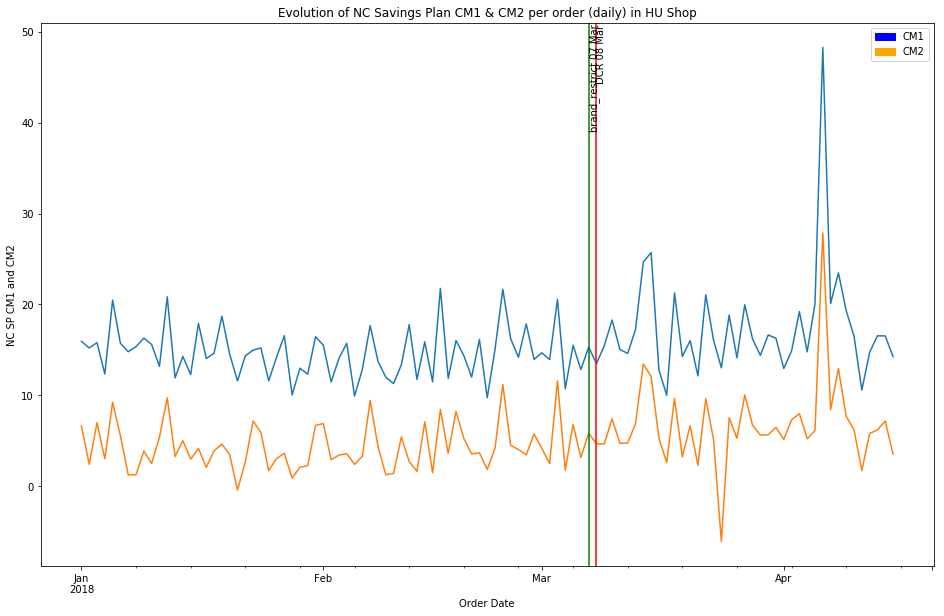

In [39]:
plt.figure(figsize=(16,10))
(sp_cm1_daily).plot()
(sp_cm2_daily).plot()
plt.ylabel('NC SP CM1 and CM2')
plt.xlabel('Order Date')
plt.title('Evolution of NC Savings Plan CM1 & CM2 per order (daily) in HU Shop')

blue_patch = mpatches.Patch(color='blue', label='CM1')
og_patch = mpatches.Patch(color='orange', label='CM2')
plt.legend(handles=[blue_patch, og_patch])

plt.axvline(x='2018-03-07', color='green')
plt.text('2018-03-07', 50, 'brand_restrict 07 Mar', rotation=90)
plt.axvline(x='2018-03-08', color='red')
plt.text('2018-03-08', 50, 'DCR 08 Mar', rotation=90)

ax = plt.gca()

**Absolute CM1**

In [40]:
#Mean CM1 per order before 07 Mar
nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] < '2018-03-07')]['SCM_D_FINANCE_CM1'].sum()/\
nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] < '2018-03-07')]['SCM_N_ORDER_NR'].nunique()

14.49300441426146

In [41]:
#CM1 per order before 07 Mar
cm1_per_order_bef = nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] < '2018-03-07')]\
.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()

In [42]:
#Mean CM1 per order from 07 Mar on
nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] >= '2018-03-07')]['SCM_D_FINANCE_CM1'].sum()/\
nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] >= '2018-03-07')]['SCM_N_ORDER_NR'].nunique()

17.18180351351351

In [43]:
#CM1 per order from 07 Mar on
cm1_per_order_aft = nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] >= '2018-03-07')]\
.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()

In [44]:
stats.ttest_ind(cm1_per_order_bef,
                cm1_per_order_aft,
                equal_var=False) 

Ttest_indResult(statistic=-2.940906556608298, pvalue=0.0034216213612125526)

Due to p-value < 0.05 we can now reject the null hypothesis stating equality of mean in both groups and go for the alternative one (non equal).

**Absolute CM2**

In [45]:
#Daily mean CM2 per order before 07 Mar
nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] < '2018-03-07')]['SCM_D_FINANCE_CM2'].sum()/\
nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] < '2018-03-07')]['SCM_N_ORDER_NR'].nunique()

4.13438675721562

In [46]:
cm2_per_order_bef = nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] < '2018-03-07')]\
.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()

In [47]:
#Daily mean CM2 per order from 07 Mar on
nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] >= '2018-03-07')]['SCM_D_FINANCE_CM2'].sum()/\
nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] >= '2018-03-07')]['SCM_N_ORDER_NR'].nunique()

6.551928648648649

In [48]:
cm2_per_order_aft = nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] >= '2018-03-07')]\
.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()

In [49]:
stats.ttest_ind(cm2_per_order_bef,
                cm2_per_order_aft,
                equal_var=False) 

Ttest_indResult(statistic=-3.410726216548214, pvalue=0.0006990726851657889)

Due to p-value < 0.05 we can now reject the null hypothesis stating equality of mean in both groups and go for the alternative one (non equal).

In [50]:
lista5 = [float(str(i).replace(',','.')) for i in nc_hu['OSP_NET_VALUE']]
nc_hu['OSP_NET_VALUE'] = lista5

In [51]:
nc_hu['REL_%_CM1'] = nc_hu['SCM_D_FINANCE_CM1'] / nc_hu['OSP_NET_VALUE'] * 100

In [52]:
nc_hu['REL_%_CM2'] = nc_hu['SCM_D_FINANCE_CM2'] / nc_hu['OSP_NET_VALUE'] * 100

In [53]:
#Relative % cm1 and cm2 (mean) per order per day 
rel_cm1_per_order = nc_hu[nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)]\
.groupby(['TDT_T_KEY_ORDER_DATE','SCM_N_ORDER_NR'],  as_index=False)['REL_%_CM1'].sum()

rel_cm1_per_order_by_day = rel_cm1_per_order.groupby('TDT_T_KEY_ORDER_DATE')['REL_%_CM1'].mean()

rel_cm2_per_order = nc_hu[nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)]\
.groupby(['TDT_T_KEY_ORDER_DATE','SCM_N_ORDER_NR'],  as_index=False)['REL_%_CM2'].sum()

rel_cm2_per_order_by_day = rel_cm2_per_order.groupby('TDT_T_KEY_ORDER_DATE')['REL_%_CM2'].mean()

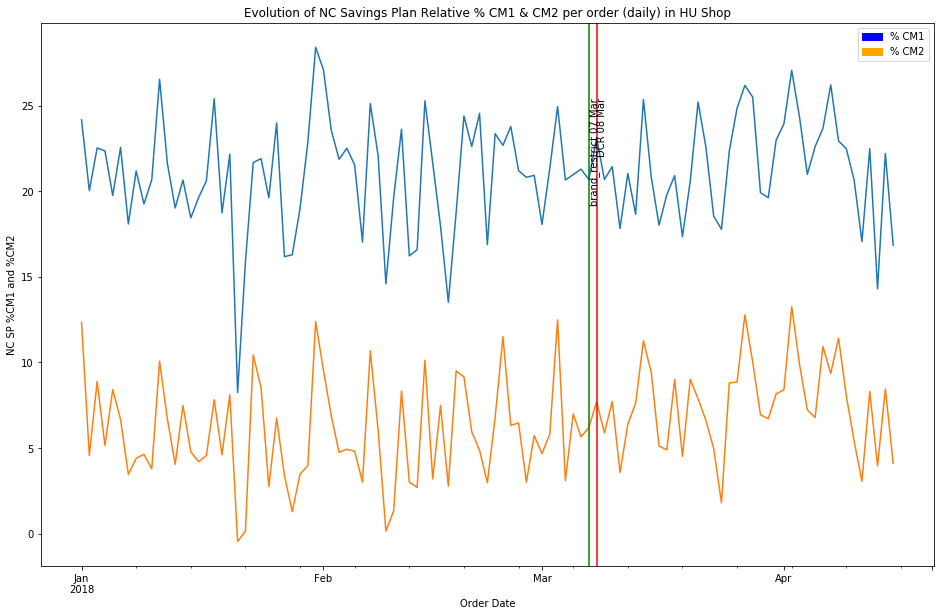

In [54]:
plt.figure(figsize=(16,10))
(rel_cm1_per_order_by_day).plot()
(rel_cm2_per_order_by_day).plot()
plt.ylabel('NC SP %CM1 and %CM2')
plt.xlabel('Order Date')
plt.title('Evolution of NC Savings Plan Relative % CM1 & CM2 per order (daily) in HU Shop')

blue_patch = mpatches.Patch(color='blue', label='% CM1')
og_patch = mpatches.Patch(color='orange', label='% CM2')
plt.legend(handles=[blue_patch, og_patch])

plt.axvline(x='2018-03-07', color='green')
plt.text('2018-03-07', 25, 'brand_restrict 07 Mar', rotation=90)
plt.axvline(x='2018-03-08', color='red')
plt.text('2018-03-08', 25, 'DCR 08 Mar', rotation=90)


ax = plt.gca()

**Relative CM1**

In [55]:
#Mean relative CM1 % per order before 07 Mar
nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] < '2018-03-07')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM1'].sum().mean()

21.051432769448972

In [56]:
#Relative CM1 % per order before 07 Mar
rel_cm1_per_order_bef = nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] < '2018-03-07')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM1'].sum()

In [57]:
#Mean relative CM1 % per order from 07 Mar on
nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] >= '2018-03-07')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM1'].sum().mean()

21.363751586202042

In [58]:
#Relative CM1 % per order from 07 Mar on
rel_cm1_per_order_aft = nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] < '2018-03-07')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM1'].sum()

**Relative CM2**

In [59]:
nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] < '2018-03-07')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM2'].sum().mean()

5.833193467341964

In [60]:
rel_cm2_per_order_bef = nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] < '2018-03-07')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM2'].sum()

In [61]:
nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] >= '2018-03-07')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM2'].sum().mean()

7.341876038623138

In [62]:
rel_cm2_per_order_aft = nc_hu[(nc_hu['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_hu['TDT_T_KEY_ORDER_DATE'] < '2018-03-07')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM2'].sum()

***SUMMARY***

| Date        | No. NC SP Sold per day| Sales NC SP Sold per day | CM1 per order (daily) | CM2 per order (daily)  | CM1% per order (daily) | CM2% per order (daily)  |
| ------------- |:-------------:| -----:|:-------------:| -----:||:-------------:| -----:|
| Before 07 Mar      | 9.06 | 42.19 | 14.49 | 4.13 |21.05% | 5.83% |
| From 07 Mar on     | 9.25      |   42.23 | 17.18 | 6.55 |21.36% | 7.34% |

...........................................................................................................................................................................................................................................

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
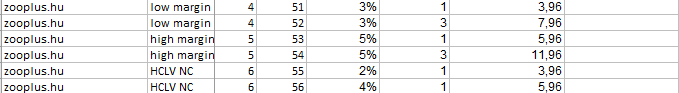

In [63]:
#Type & number of different Savings Plan bought
nc_hu[nc_hu['SCM_MASTER_AP_ID'] == 42225]['CZP_ZTQ_ID'].value_counts()

56.0    351
55.0     22
Name: CZP_ZTQ_ID, dtype: int64

In [64]:
#Number of 1st and 2nd orders in our dataset
nc_hu.groupby('SCM_N_ORDER_NR')['OSP_KO_COUNT_NET'].mean().value_counts()

1    11250
2     6971
Name: OSP_KO_COUNT_NET, dtype: int64

In [65]:
#Let's list new lead PG4 restrictions for HU SHOP
pg4_excluded = [1060, 255, 2304, 719, 283, 519, 1308, 2302, 282, 311, 318, 750, 167128, 720, 13291, 2712, 31963, 314, 
               23302, 15418, 286, 18180, 285, 867, 17198, 171388, 179035, 2069, 2079, 2125, 218624, 2078, 39209, 18149, 
               9616, 154882, 17871, 2137, 18148, 17225]

In [66]:
#HCLV PG3 old
pg3_hclv_old = [857, 251, 2068, 252, 18, 301, 23, 29, 34, 38]

In [67]:
#HCLV PG3 new set up
pg3_hclv_new = [23, 38, 251, 252, 857, 2068]

In [68]:
#Split dataset using 08/03/2018 as inflection point...
bef = nc_hu[nc_hu['TDT_T_KEY_ORDER_DATE'] < '2018-03-07']
aft = nc_hu[nc_hu['TDT_T_KEY_ORDER_DATE'] >= '2018-03-07']

In [69]:
bef['SCM_N_ORDER_NR'].nunique(), aft['SCM_N_ORDER_NR'].nunique()

(11592, 6629)

**Conversion before 07 Mar Period**

Let's evaluate NC SP conversion in first orders (before 07 Mar) dividing total SP sold in first order (having HCLV PG3 old set up and AP_ID == 42225) by total 1st orders placed having the suitable HCLV PG3 (old set up):

In [70]:
#All eligible customers in 1st orders having HCLV PG3 (old set up)
all_elig_1st = bef[(bef['OSP_KO_COUNT_NET'] == 1) & (bef['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_old))]['CUS_N_KEY_CUSTOMER'].unique()

In [71]:
#Those eligible in 1st order who also bought it
buy_in_1st = bef[(bef['OSP_KO_COUNT_NET'] == 1) & (bef['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_old)) & (bef['SCM_MASTER_AP_ID'] == 42225)]\
['CUS_N_KEY_CUSTOMER'].unique()

In [72]:
len(buy_in_1st)

269

In [73]:
len(all_elig_1st)

4285

% Conversion rate in 1st orders

In [74]:
float(len(buy_in_1st)) / len(all_elig_1st) * 100

6.2777129521586925

Let's go through 2nd orders conversion using set operations. Due to time window, we are going to use only data from customer having both, 1st and 2nd orders in the dataset.

In [75]:
#Total customers id in 1st orders
cus_1st = bef[bef['OSP_KO_COUNT_NET'] == 1]['CUS_N_KEY_CUSTOMER'].unique()

In [76]:
#Total 2nd orders
cus_2nd = bef[bef['OSP_KO_COUNT_NET'] == 2]['CUS_N_KEY_CUSTOMER'].unique()

In [77]:
cus_sample = [i for i in cus_1st if i in cus_2nd]

In [78]:
#1st orders in cus_sample
cus_1_st = bef[(bef['OSP_KO_COUNT_NET'] == 1) &
           bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample)]['CUS_N_KEY_CUSTOMER'].unique()

In [79]:
#2nd orders in cus_sample
cus_2_nd = bef[(bef['OSP_KO_COUNT_NET'] == 2) &
           bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample)]['CUS_N_KEY_CUSTOMER'].unique()

In [80]:
len(cus_sample), len(cus_1_st), len(cus_2_nd)

(1280, 1280, 1280)

In [81]:
#Eligible customer ids in 1st order
cus_elig_1st = bef[(bef['OSP_KO_COUNT_NET'] == 1) & (bef['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_old)) &
                  (bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample))]['CUS_N_KEY_CUSTOMER'].unique()

In [82]:
len(cus_elig_1st)

882

In [83]:
#Non-eligible customer ids in 1st order
cus_not_elig_1st = [i for i in cus_1_st if i not in cus_elig_1st]

In [84]:
len(cus_not_elig_1st)

398

In [85]:
len(cus_elig_1st) + len(cus_not_elig_1st) == len(cus_1_st)

True

In [86]:
#Customer ids elegible in 1st and buying SP in 1st
cus_buy_in_1st = bef[(bef['OSP_KO_COUNT_NET'] == 1) & (bef['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_old)) &
                (bef['SCM_MASTER_AP_ID'] == 42225) & (bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample))]\
                ['CUS_N_KEY_CUSTOMER'].unique()

In [87]:
len(cus_buy_in_1st)

66

% Conversion rate in 1st orders for our sample (higher...due to a more buying frequency?)

In [88]:
float(len(cus_buy_in_1st)) / len(cus_elig_1st) * 100

7.482993197278912

In [89]:
#Customer ids elegible in 1st but not buying SP 
cus_elig_1st_not_buy = [i for i in cus_elig_1st if i not in cus_buy_in_1st]

In [90]:
len(cus_elig_1st_not_buy)

816

In [91]:
len(cus_buy_in_1st) + len(cus_elig_1st_not_buy) == len(cus_elig_1st)

True

In [92]:
#Customer ids with suitable 2nd orders to offer SP looking at lead PG3 (fake)
cus_elig_2nd = bef[(bef['OSP_KO_COUNT_NET'] == 2) & (bef['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_old)) &
                  (bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample))]['CUS_N_KEY_CUSTOMER'].unique()

In [93]:
len(cus_elig_2nd)

921

In [94]:
#Customer ids with no suitable 2nd orders to offer SP looking at lead PG3 (fake)
cus_not_elig_2nd = [i for i in cus_2_nd if i not in cus_elig_2nd]

In [95]:
len(cus_not_elig_2nd)

359

In [96]:
#Total SP bought in 2nd order
cus_buy_in_2nd = bef[(bef['OSP_KO_COUNT_NET'] == 2) & (bef['SCM_MASTER_AP_ID'] == 42225) &
                   (bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample))]['CUS_N_KEY_CUSTOMER'].unique()

In [97]:
len(cus_buy_in_2nd)

103

In [98]:
#Eligible in 1st order customer ids making a 2nd order but not buying 
cus_elig_1st_2nd = [i for i in cus_elig_1st_not_buy if i in cus_2_nd and i not in cus_buy_in_2nd]

In [99]:
len(cus_elig_1st_2nd)

723

In [100]:
#Eligible in 1st order customer ids making a 2nd order where SP is bought 
cus_elig_1st_buy_2nd = [i for i in cus_elig_1st_not_buy if i in cus_buy_in_2nd]

In [101]:
len(cus_elig_1st_buy_2nd)

93

In [102]:
len(cus_elig_1st_2nd) + len(cus_elig_1st_buy_2nd) == len(cus_elig_1st_not_buy)

True

In [103]:
#Customers ids non eligible in 1st, eligible during 2nd and not buying SP
cus_not_elig_1st_2nd = [i for i in cus_not_elig_1st if i in cus_elig_2nd and i not in cus_buy_in_2nd]

In [104]:
len(cus_not_elig_1st_2nd)

154

In [105]:
#Customers ids non eligible in 1st, eligible during 2nd and buying SP
cus_not_elig_1st_buy_2nd = [i for i in cus_not_elig_1st if i in cus_buy_in_2nd]

In [106]:
len(cus_not_elig_1st_buy_2nd)

10

In [107]:
#eligible and non eligible customer ids in 1st order, eligible in 2nd and buying SP
len(cus_elig_1st_buy_2nd) + len(cus_not_elig_1st_buy_2nd)

103

In [108]:
#Total eligible customer ids in 2nd order
len(cus_elig_1st_2nd) + len(cus_elig_1st_buy_2nd) + len(cus_not_elig_1st_2nd) + len(cus_not_elig_1st_buy_2nd)

980

% Conversion rate in 2nd order

In [109]:
float(len(cus_elig_1st_buy_2nd) + len(cus_not_elig_1st_buy_2nd))/\
(len(cus_elig_1st_2nd) + len(cus_elig_1st_buy_2nd) + len(cus_not_elig_1st_2nd) + len(cus_not_elig_1st_buy_2nd)) * 100

10.510204081632653

**Conversion from 07 Mar Period**

In [110]:
#Number of 1st and 2nd orders from 07 Mar on
aft_1st = aft.groupby('SCM_N_ORDER_NR')['OSP_KO_COUNT_NET'].mean()[aft.groupby('SCM_N_ORDER_NR')['OSP_KO_COUNT_NET'].mean() == 1].index.values
aft_2nd = aft.groupby('SCM_N_ORDER_NR')['OSP_KO_COUNT_NET'].mean()[aft.groupby('SCM_N_ORDER_NR')['OSP_KO_COUNT_NET'].mean() == 2].index.values

In [111]:
#All eligible customers in 1st orders having HCLV PG3 (new set up) and not having excluding PG4
all_elig_1st_a = aft[(aft['OSP_KO_COUNT_NET'] == 1) & (aft['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new))
                    & (~aft['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded))]['CUS_N_KEY_CUSTOMER'].unique()

In [112]:
#Those eligible in 1st order who also bought it
buy_in_1st_a = aft[(aft['OSP_KO_COUNT_NET'] == 1) & (aft['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new)) &
                   (~aft['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded)) & (aft['SCM_MASTER_AP_ID'] == 42225)]\
                    ['CUS_N_KEY_CUSTOMER'].unique()

In [113]:
len(buy_in_1st_a)

198

In [114]:
len(all_elig_1st_a)

1576

% Conversion rate in 1st orders

In [115]:
float(len(buy_in_1st_a)) / len(all_elig_1st_a) * 100

12.563451776649744

Let's go through 2nd orders conversion using set operations. Due to time window, we are going to use only data from customer having both, 1st and 2nd orders in the dataset.

In [116]:
#Total customers id in 1st orders
cus_1st_a = aft[aft['OSP_KO_COUNT_NET'] == 1]['CUS_N_KEY_CUSTOMER'].unique()

In [117]:
#Total 2nd orders
cus_2nd_a = aft[aft['OSP_KO_COUNT_NET'] == 2]['CUS_N_KEY_CUSTOMER'].unique()

In [118]:
cus_sample_a = [i for i in cus_1st_a if i in cus_2nd_a]

In [119]:
cus_1_st_a = aft[(aft['OSP_KO_COUNT_NET'] == 1) &
           aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a)]['CUS_N_KEY_CUSTOMER'].unique()

In [120]:
cus_2_nd_a = aft[(aft['OSP_KO_COUNT_NET'] == 2) &
           aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a)]['CUS_N_KEY_CUSTOMER'].unique()

In [121]:
len(cus_sample_a), len(cus_1_st_a), len(cus_2_nd_a)

(427, 427, 427)

In [122]:
#Eligible customer ids in 1st order
cus_elig_1st_a = aft[(aft['OSP_KO_COUNT_NET'] == 1) & (aft['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new)) &
                (~aft['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded)) & (aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a))]\
                ['CUS_N_KEY_CUSTOMER'].unique()

In [123]:
len(cus_elig_1st_a)

184

In [124]:
#Non-eligible customer ids in 1st order
cus_not_elig_1st_a = [i for i in cus_1_st_a if i not in cus_elig_1st_a]

In [125]:
len(cus_not_elig_1st_a)

243

In [126]:
len(cus_elig_1st_a) + len(cus_not_elig_1st_a) == len(cus_1_st_a)

True

In [127]:
#Customer ids elegible in 1st and buying SP in 1st
cus_buy_in_1st_a = aft[(aft['OSP_KO_COUNT_NET'] == 1) & (aft['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new)) &
                    (~aft['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded)) &
                    (aft['SCM_MASTER_AP_ID'] == 42225) & (aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a))]\
                    ['CUS_N_KEY_CUSTOMER'].unique()

In [128]:
len(cus_buy_in_1st_a)

29

% Conversion rate in 1st orders for our sample (higher...due to a more buying frequency?)

In [129]:
float(len(cus_buy_in_1st_a)) / len(cus_elig_1st_a) * 100

15.760869565217392

In [130]:
#Customer ids elegible in 1st but not buying SP 
cus_elig_1st_not_buy_a = [i for i in cus_elig_1st_a if i not in cus_buy_in_1st_a]

In [131]:
len(cus_elig_1st_not_buy_a)

155

In [132]:
len(cus_buy_in_1st_a) + len(cus_elig_1st_not_buy_a) == len(cus_elig_1st_a)

True

In [133]:
#Customer ids with suitable 2nd orders to offer SP looking at lead PG3 (fake)
cus_elig_2nd_a = aft[(aft['OSP_KO_COUNT_NET'] == 2) & (aft['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new)) &
                   (~aft['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded)) &
                  (aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a))]['CUS_N_KEY_CUSTOMER'].unique()

In [134]:
len(cus_elig_2nd_a)

193

In [135]:
#Customer ids with no suitable 2nd orders to offer SP looking at lead PG3 (fake)
cus_not_elig_2nd_a = [i for i in cus_2_nd_a if i not in cus_elig_2nd_a]

In [136]:
len(cus_not_elig_2nd_a)

234

In [137]:
#Total SP bought in 2nd order
cus_buy_in_2nd_a = aft[(aft['OSP_KO_COUNT_NET'] == 2) & (aft['SCM_MASTER_AP_ID'] == 42225) &
                   (aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a))]['CUS_N_KEY_CUSTOMER'].unique()

In [138]:
len(cus_buy_in_2nd_a)

27

In [139]:
#Eligible in 1st order (not buying) customer ids making a 2nd order but not buying 
cus_elig_1st_2nd_a = [i for i in cus_elig_1st_not_buy_a if i in cus_2_nd_a and i not in cus_buy_in_2nd_a]

In [140]:
len(cus_elig_1st_2nd_a)

137

In [141]:
#Eligible in 1st order customer ids making a 2nd order where SP is bought 
cus_elig_1st_buy_2nd_a = [i for i in cus_elig_1st_not_buy_a if i in cus_buy_in_2nd_a]

In [142]:
len(cus_elig_1st_buy_2nd_a)

18

In [143]:
len(cus_elig_1st_2nd_a) + len(cus_elig_1st_buy_2nd_a) == len(cus_elig_1st_not_buy_a)

True

In [144]:
#Customer ids non-eligible in 1st, eligible during 2nd and not buying
cus_not_elig_1st_2nd_a = [i for i in cus_not_elig_1st_a if i in cus_elig_2nd_a and i not in cus_buy_in_2nd_a]

In [145]:
len(cus_not_elig_1st_2nd_a)

56

In [146]:
#Customer ids non-eligible in 1st, eligible during 2nd and buying SP
cus_not_elig_1st_buy_2nd_a = [i for i in cus_not_elig_1st_a if i in cus_buy_in_2nd_a]

In [147]:
len(cus_not_elig_1st_buy_2nd_a)

9

In [148]:
#eligible and non-eligible customer ids in 1st order, eligible in 2nd and buying SP
len(cus_elig_1st_buy_2nd_a) + len(cus_not_elig_1st_buy_2nd_a)

27

In [149]:
#Total eligible customer ids in 2nd order
len(cus_elig_1st_2nd_a) + len(cus_elig_1st_buy_2nd_a) + len(cus_not_elig_1st_2nd_a) + len(cus_not_elig_1st_buy_2nd_a)

220

% Conversion rate in 2nd order

In [150]:
float(len(cus_elig_1st_buy_2nd_a) + len(cus_not_elig_1st_buy_2nd_a))/\
(len(cus_elig_1st_2nd_a) + len(cus_elig_1st_buy_2nd_a) + len(cus_not_elig_1st_2nd_a) + len(cus_not_elig_1st_buy_2nd_a)) * 100

12.272727272727273

..............................................................................................................................................................................................................................................................

| Date        | 1st order conversion %           | (sample) 2nd order conversion % |
| ------------- |:-------------:| -----:|
| Before 07 Mar      | 6.28 | 10.51 |
| From 07 Mar on     | 12.56      |  12.27 |


2nd order conversion is a bit tricky, we have for first period a 3 month time window (time enough for replenishment and repurchase) instead of a 1 month time window for the period after the changes. For calculations, we have selected in each time window only customers having placed 1st and 2nd order.

DCR?

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>


In [151]:
nc_hu[nc_hu['TDT_T_KEY_ORDER_DATE'] >= ' 2018-03-07']['SCM_OCI_LAND'].unique()

array(['HU'], dtype=object)

In [152]:
allowed_c = ['HU']

In [153]:
dcr = nc_hu[(nc_hu['TDT_T_KEY_ORDER_DATE'] >= ' 2018-03-08') & (~nc_hu['SCM_OCI_LAND'].isin(allowed_c))]

In [154]:
len(dcr['SCM_N_ORDER_NR'].unique())

0

In [155]:
#No SP sold
(dcr['SCM_MASTER_AP_ID'] == 42225).sum()

0

In [156]:
#No SP discount applying neither
(dcr['SCM_MASTER_AP_ID'] == 42715).sum()

0

In [157]:
#Criteria
len(dcr[(dcr['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new)) & (~dcr['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded))]['SCM_N_ORDER_NR'].unique())

0